# Digital Transformation in Banking Sector

                                                                                            Code written by : Dasari Mohan

### PROJECT OBJECTIVE :

To Build a Machine learning model to perform focused digital marketing by predicting the potential customers who will convert from liability customers to asset customers.

### CONTEXT :
A Bank has a growing customer base where majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. In the last town hall, the marketing head mentioned that digital transformation being the core strength of the business strategy, how to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign. I as a data scientist have to develop machine learning model to identify potential borrowers to support focused marketing.

### DATA DESCRIPTION: 

#### The data consists of the following attributes:
1) ID: Customer ID

2) Age Customer’s approximate age.

3) CustomerSince: Customer of the bank since. [unit is masked]

4) HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]

5) ZipCode: Customer’s zip code.

6) HiddenScore: A score associated to the customer which is masked by the bank as an IP.

7) MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]

8) Level: A level associated to the customer which is masked by the bank as an IP.

9) Mortgage: Customer’s mortgage. [unit is masked]

10) Security: Customer’s security asset with the bank. [unit is masked]

11) FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]

12) InternetBanking: if the customer uses internet banking.

13) CreditCard: if the customer uses bank’s credit card.

14) LoanOnCard: if the customer has a loan on credit card

In [1]:
# import required libraries
import numpy as np     # for numerical operations 
import pandas as pd    # for reading dataset
import seaborn as sns  # for graphical representation of dataset
import matplotlib.pyplot as plt  # for ploting bar graphs,sfcatter plot etc
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [44]:
# Load the dataset using pandas
data1 = pd.read_csv('Data1.csv')
data2 = pd.read_csv('Data2.csv')
print(data1.head(3))
print()
print(data2.head(3))

   ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  

   ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  


In [45]:
# Merge the 2 datasets
cust_data = data1.merge(data2,how='inner',on='ID')
print('Shape :',cust_data.shape)
cust_data.head(5)

Shape : (5000, 14)


,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [46]:
# Lets explore data types
cust_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

#### Observation: 
As all data attributes are quantitative data, we don't need data transformation here.

In [47]:
# Data description
cust_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [48]:
# Dropping ID as it doesn't have any impact on learning
cust_data = cust_data.drop('ID',axis=1)
cust_data

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [49]:
# Checking for null values
cust_data.isnull().mean()*100

Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

#### Observervation : 
LoanOnCard attribute has 0.4% null values of total data. Secondly, it is the target class hence we can't replace null values using mean or mode. We can remove these data from our dataset as it doesn't impact our model performance.

In [50]:
# Using Pandas dropna function to drop rows having null values.
cust_data = cust_data.dropna()
cust_data.shape

(4980, 13)

# Exploratory Data Analysis

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

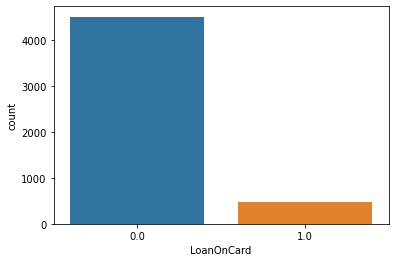

In [51]:
sns.countplot(x='LoanOnCard',data=cust_data)

#### This plot clearly shows data is highly imbalanced.

## Calculate target class data percentage

In [52]:
n_true = len(cust_data.loc[cust_data['LoanOnCard']==1.0])
n_false = len(cust_data.loc[cust_data['LoanOnCard']==0.0])

print('No.of true cases: {0} ({1:2.2f}%)'.format(n_true, (n_true / (n_true + n_false)) * 100 ))
print('No.of False cases: {0} ({1:2.2f}%)'.format(n_false, (n_false / (n_true + n_false)) * 100 ))

No.of true cases: 480 (9.64%)
No.of False cases: 4500 (90.36%)


[None]

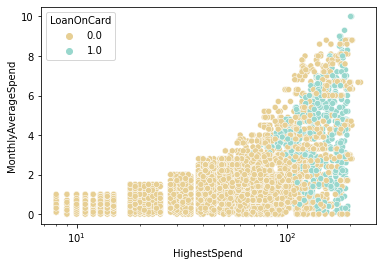

In [56]:
# Scatter plot to see how data points are distributed for "MonthlyAverageSpend" and "HighestSpend" as per target class
g = sns.scatterplot(x='HighestSpend', y='MonthlyAverageSpend',hue='LoanOnCard',data=cust_data, legend=True,palette='BrBG')
g.set(xscale='log')

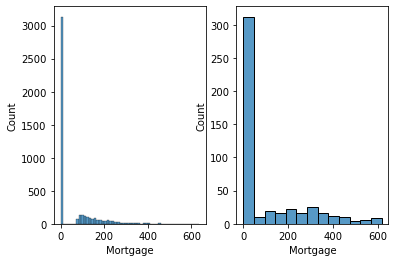

In [57]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

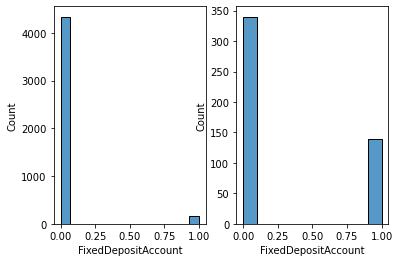

In [58]:
fig, ax = plt.subplots(1,2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'FixedDepositAccount'],ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'FixedDepositAccount'],ax = ax[1])
plt.show()

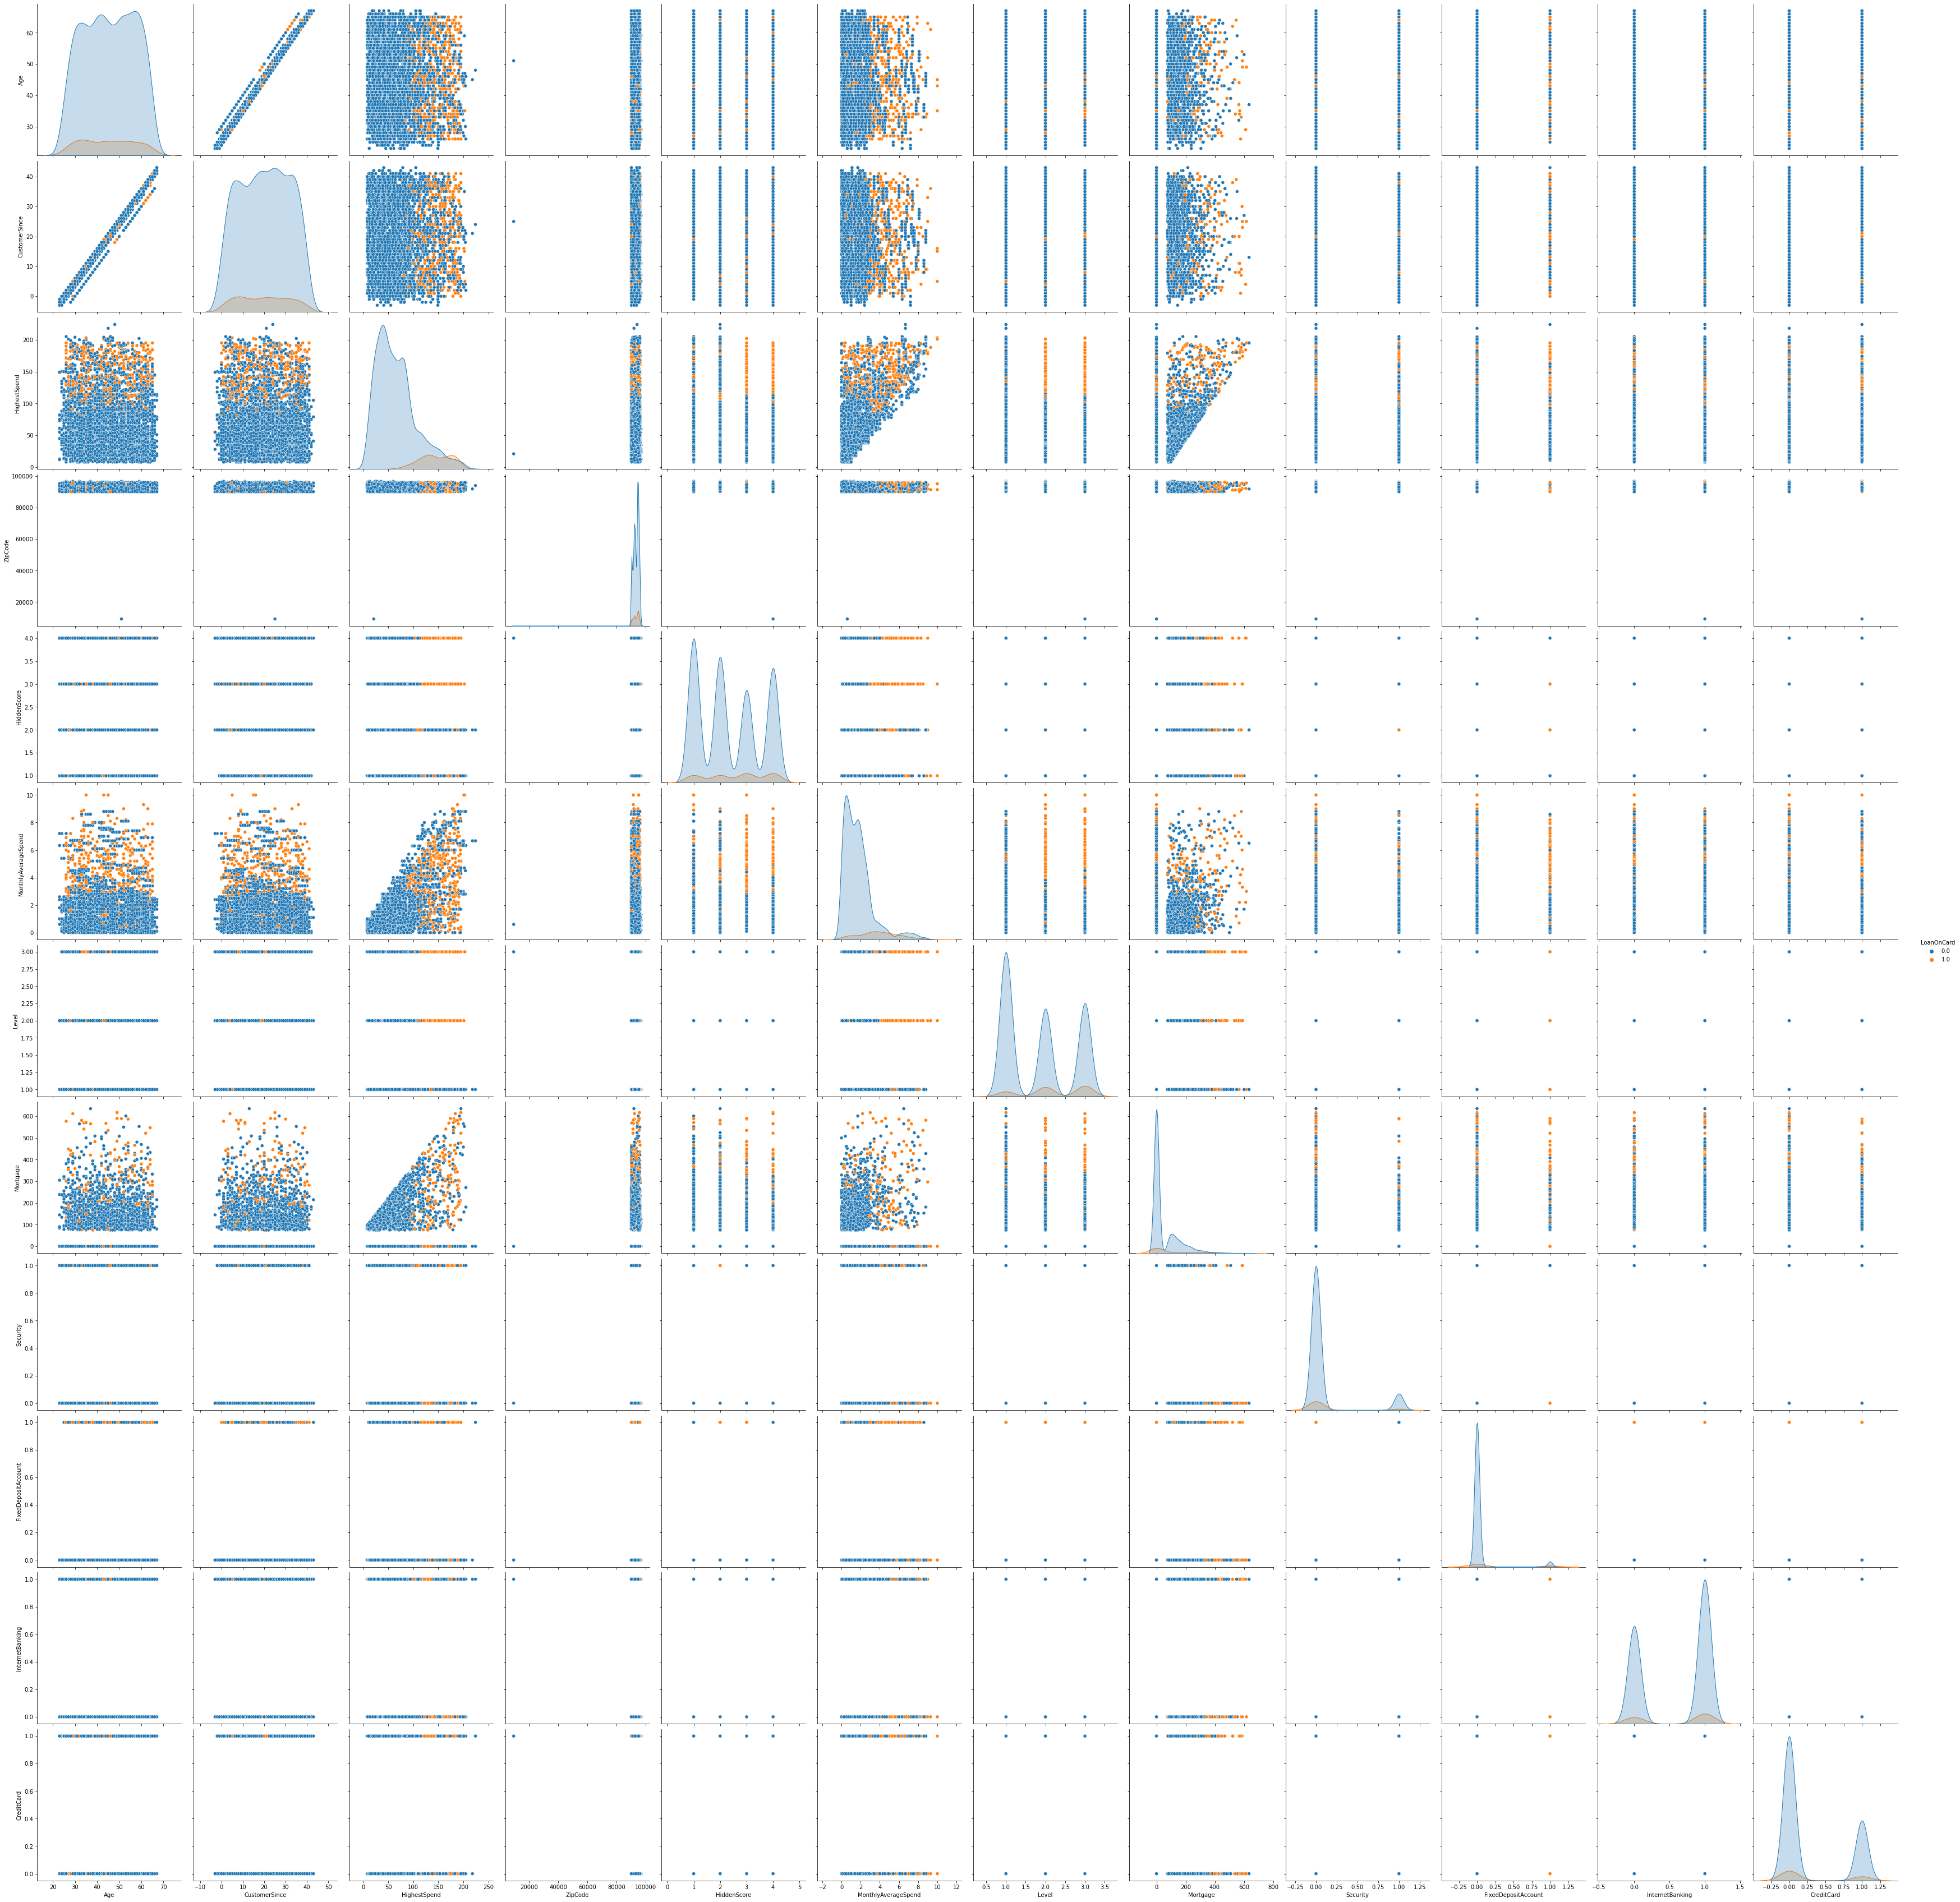

In [59]:
sns.pairplot(data=cust_data,height=4,hue='LoanOnCard')

#### Observations :
1) Zipcode doesn't have any significance with other dependant variables and on learning, hence drop it from dependant variable list.

2) 'Age' and 'CustomerSince' have similar information content. Lets verify it through correlation analysis.

In [61]:
cust_data = cust_data.drop('ZipCode',axis=1)
cust_data.shape

(4980, 12)

In [62]:
# Correlation analysis
correlation = cust_data.corr()
correlation

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
Age,1.000000,0.994208,-0.054951,-0.045289,-0.051896,0.042750,-0.013272,0.000323,0.007744,0.011227,0.007344,-0.008147
CustomerSince,0.994208,1.000000,-0.046092,-0.051456,-0.049918,0.014545,-0.011380,-0.000469,0.010085,0.011355,0.008779,-0.007801
HighestSpend,-0.054951,-0.046092,1.000000,-0.158357,0.646109,-0.188909,0.207236,-0.002284,0.169535,0.014202,-0.002780,0.502626
HiddenScore,-0.045289,-0.051456,-0.158357,1.000000,-0.109180,0.065762,-0.021396,0.019061,0.014327,0.010900,0.010784,0.061761
MonthlyAverageSpend,-0.051896,-0.049918,0.646109,-0.109180,1.000000,-0.137020,0.110275,0.015105,0.136410,-0.003475,-0.006577,0.366912
Level,0.042750,0.014545,-0.188909,0.065762,-0.137020,1.000000,-0.032863,-0.009443,0.013982,-0.014556,-0.011766,0.137010
Mortgage,-0.013272,-0.011380,0.207236,-0.021396,0.110275,-0.032863,1.000000,-0.005002,0.089167,-0.007044,-0.007600,0.141947
Security,0.000323,-0.000469,-0.002284,0.019061,0.015105,-0.009443,-0.005002,1.000000,0.317673,0.014007,-0.014518,0.021982
FixedDepositAccount,0.007744,0.010085,0.169535,0.014327,0.136410,0.013982,0.089167,0.317673,1.000000,0.176082,0.278924,0.316131
InternetBanking,0.011227,0.011355,0.014202,0.010900,-0.003475,-0.014556,-0.007044,0.014007,0.176082,1.000000,0.004960,0.006034


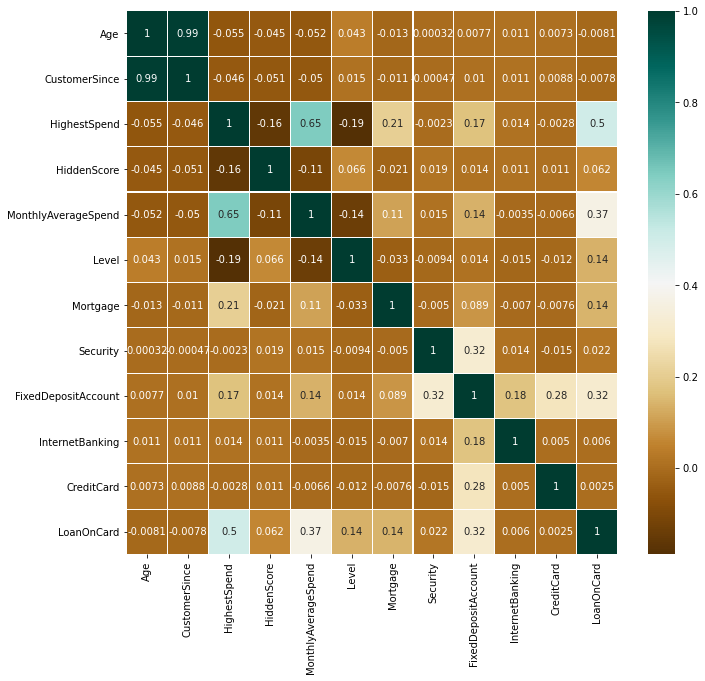

In [68]:
# Heat Map
plt.figure(figsize= (11,10))
sns.heatmap(data=correlation, cmap='BrBG', annot=True, linewidths=0.07)
plt.show()

#### Obervation:
    As "Age" and "CustomerSince" are highly correlated, we can drop 1. Here, I am dropping "Age" column

In [69]:
cust_data = cust_data.drop('Age',axis=1)
print(cust_data.shape)
cust_data.head(5)

(4980, 11)


,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
9,9,180,1,8.9,3,0,0,0,0,0,1.0
10,39,105,4,2.4,3,0,0,0,0,0,0.0
11,5,45,3,0.1,2,0,0,0,1,0,0.0
12,23,114,2,3.8,3,0,1,0,0,0,0.0
13,32,40,4,2.5,2,0,0,0,1,0,0.0


## Splitting the dataset into Train and Test Sets

    We can use 70 % of data as Train data and remainig 30% as test data

In [70]:
from sklearn.model_selection import train_test_split

X = cust_data.drop('LoanOnCard',axis=1) # feature columns
y = cust_data['LoanOnCard'] # target variable

print('X shape:',X.shape)
print('y shape:',y.shape)  

X shape: (4980, 10)
y shape: (4980,)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)  
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (3486, 10)
X_test shape: (1494, 10)
y_train shape: (3486,)
y_test shape: (1494,)


## Logistic Regression Algorithm

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Bulkid a  model
model = LogisticRegression(solver='liblinear')

# Fit the model
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [108]:
# Prediction
y_predict = model.predict(X_test)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Accuracy score: 0.9451137884872824
confusion matrix:
 [[1325   25]
 [  57   87]]
precision score: 0.7767857142857143
roc_auc score: 0.7928240740740741
recall score: 0.6041666666666666
f1 score: 0.6796875


#### Observation:
For minority class, the above model is able to predict 87 correctly, out of 154. Although the accuracy is high, still the model is not a good model as f1 score is low. We need to handle the unbalanced data.

## Weighted Logistic Regression to handle class inbalance

In [87]:
w = {0:1,1:2}

model_weighted = LogisticRegression(class_weight=w,random_state=44,solver='liblinear')
model_weighted.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 2}, random_state=44,
                   solver='liblinear')

In [88]:
# Prediction
y_predict = model_weighted.predict(X_test)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))

print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Accuracy score: 0.9357429718875502
confusion matrix:
 [[1299   51]
 [  45   99]]
roc_auc score: 0.8248611111111112
precision score: 0.66
recall score: 0.6875
f1 score: 0.673469387755102


### Oberveration:
   Although the accuracy decreases, AUC and recall increases significantly, hence, model with balanced weights is better model.
   
# Naive Bayes Algorithm

In [89]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [90]:
# Prediction
y_predict = model.predict(X_test)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))

print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Accuracy score: 0.8708165997322623
confusion matrix:
 [[1215  135]
 [  58   86]]
roc_auc score: 0.7486111111111112
precision score: 0.3891402714932127
recall score: 0.5972222222222222
f1 score: 0.4712328767123288


#### Use of class prior for imbalanced data

In [91]:
model_prior = GaussianNB(priors=[0.1,0.9])

model_prior.fit(X_train,y_train)

GaussianNB(priors=[0.1, 0.9])

In [92]:
# Prediction
y_predict = model_prior.predict(X_test)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))

print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Accuracy score: 0.7971887550200804
confusion matrix:
 [[1059  291]
 [  12  132]]
roc_auc score: 0.8505555555555555
precision score: 0.3120567375886525
recall score: 0.9166666666666666
f1 score: 0.46560846560846564


## Support Vector Machines Algorithm

In [94]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

SVC()

In [95]:
# Prediction
y_predict = model.predict(X_test)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))

print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Accuracy score: 0.9089692101740294
confusion matrix:
 [[1342    8]
 [ 128   16]]
roc_auc score: 0.5525925925925926
precision score: 0.6666666666666666
recall score: 0.1111111111111111
f1 score: 0.1904761904761905


In [104]:
# Scaling the data
from scipy.stats import zscore
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 
XScaled.describe()

,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
count,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03,4.980000e+03
mean,-8.493875e-17,-3.322420e-16,3.342262e-16,1.652404e-16,5.178366e-16,-1.341631e-16,-6.706594e-16,1.842123e-16,4.582234e-16,-7.633341e-17
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-2.015918e+00,-1.429540e+00,-1.216634e+00,-1.108414e+00,-1.048644e+00,-5.557467e-01,-3.414556e-01,-2.540817e-01,-1.217601e+00,-6.459012e-01
25%,-8.822859e-01,-7.565844e-01,-1.216634e+00,-7.083749e-01,-1.048644e+00,-5.557467e-01,-3.414556e-01,-2.540817e-01,-1.217601e+00,-6.459012e-01
50%,-1.026117e-02,-2.138784e-01,-3.448588e-01,-2.511878e-01,1.417474e-01,-5.557467e-01,-3.414556e-01,-2.540817e-01,8.212871e-01,-6.459012e-01
75%,8.617636e-01,5.242016e-01,5.269162e-01,3.345832e-01,1.332139e+00,4.361362e-01,-3.414556e-01,-2.540817e-01,8.212871e-01,1.548224e+00
max,1.995396e+00,3.259439e+00,1.398691e+00,4.606425e+00,1.332139e+00,5.680349e+00,2.928638e+00,3.935742e+00,8.212871e-01,1.548224e+00


In [109]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(XScaled, y, test_size=0.3, random_state=42)

### Grid Search in SVM

In [110]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [0.1,0.5,1,10], 'C':[0.1,1,10,100]}

model_grid = GridSearchCV(estimator=SVC(),param_grid=params_grid)

model_grid.fit(X_train1,y_train1)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.5, 1, 10]})

In [111]:
print(model_grid.best_params_)
print(model_grid.best_estimator_)

{'C': 10, 'gamma': 0.1}
SVC(C=10, gamma=0.1)


In [113]:
# Model with best parameters
final_model = SVC(C=10, gamma=0.1)
final_model.fit(X_train1,y_train1)

# Prediction
y_predict = final_model.predict(X_test1)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_test1,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test1,y_predict))
print('roc_auc score:',roc_auc_score(y_test1,y_predict))
print('precision score:',precision_score(y_test1,y_predict))

print('recall score:',recall_score(y_test1,y_predict))
print('f1 score:',f1_score(y_test1,y_predict))

Accuracy score: 0.9705488621151271
confusion matrix:
 [[1329   21]
 [  23  121]]
roc_auc score: 0.9123611111111111
precision score: 0.852112676056338
recall score: 0.8402777777777778
f1 score: 0.8461538461538463


# Decision Tree Classifier algorithm

In [114]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', random_state=23)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=23)

In [117]:
# Prediction
y_predict = model.predict(X_test)

# Preformance Metrics
# Scoring our DT
print('Train score:',model.score(X_train, y_train))
print('Test score:',model.score(X_test, y_test))

print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))
print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Train score: 1.0
Test score: 0.9745649263721553
Accuracy score: 0.9745649263721553
confusion matrix:
 [[1330   20]
 [  18  126]]
roc_auc score: 0.9300925925925926
precision score: 0.863013698630137
recall score: 0.875
f1 score: 0.8689655172413793


#### Observation:
From above metrics we can clearly see that the model is Overfitted, lets tune some of hyperparameters in the classifier

In [118]:
# Reducing over fitting (Regularization)

model_dtree = model = DecisionTreeClassifier(criterion='gini', max_depth = 6, random_state=23)
model_dtree.fit(X_train,y_train)

# Prediction
y_predict = model_dtree.predict(X_test)

# Preformance Metrics
# Scoring our DT
print('Train score:',model_dtree.score(X_train, y_train))
print('Test score:',model_dtree.score(X_test, y_test))

print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))
print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Train score: 0.9922547332185886
Test score: 0.9785809906291834
Accuracy score: 0.9785809906291834
confusion matrix:
 [[1335   15]
 [  17  127]]
roc_auc score: 0.9354166666666667
precision score: 0.8943661971830986
recall score: 0.8819444444444444
f1 score: 0.888111888111888


#### Observation:
The performance metrics looks good compare to previous model. Now, lets visualize the decision tree

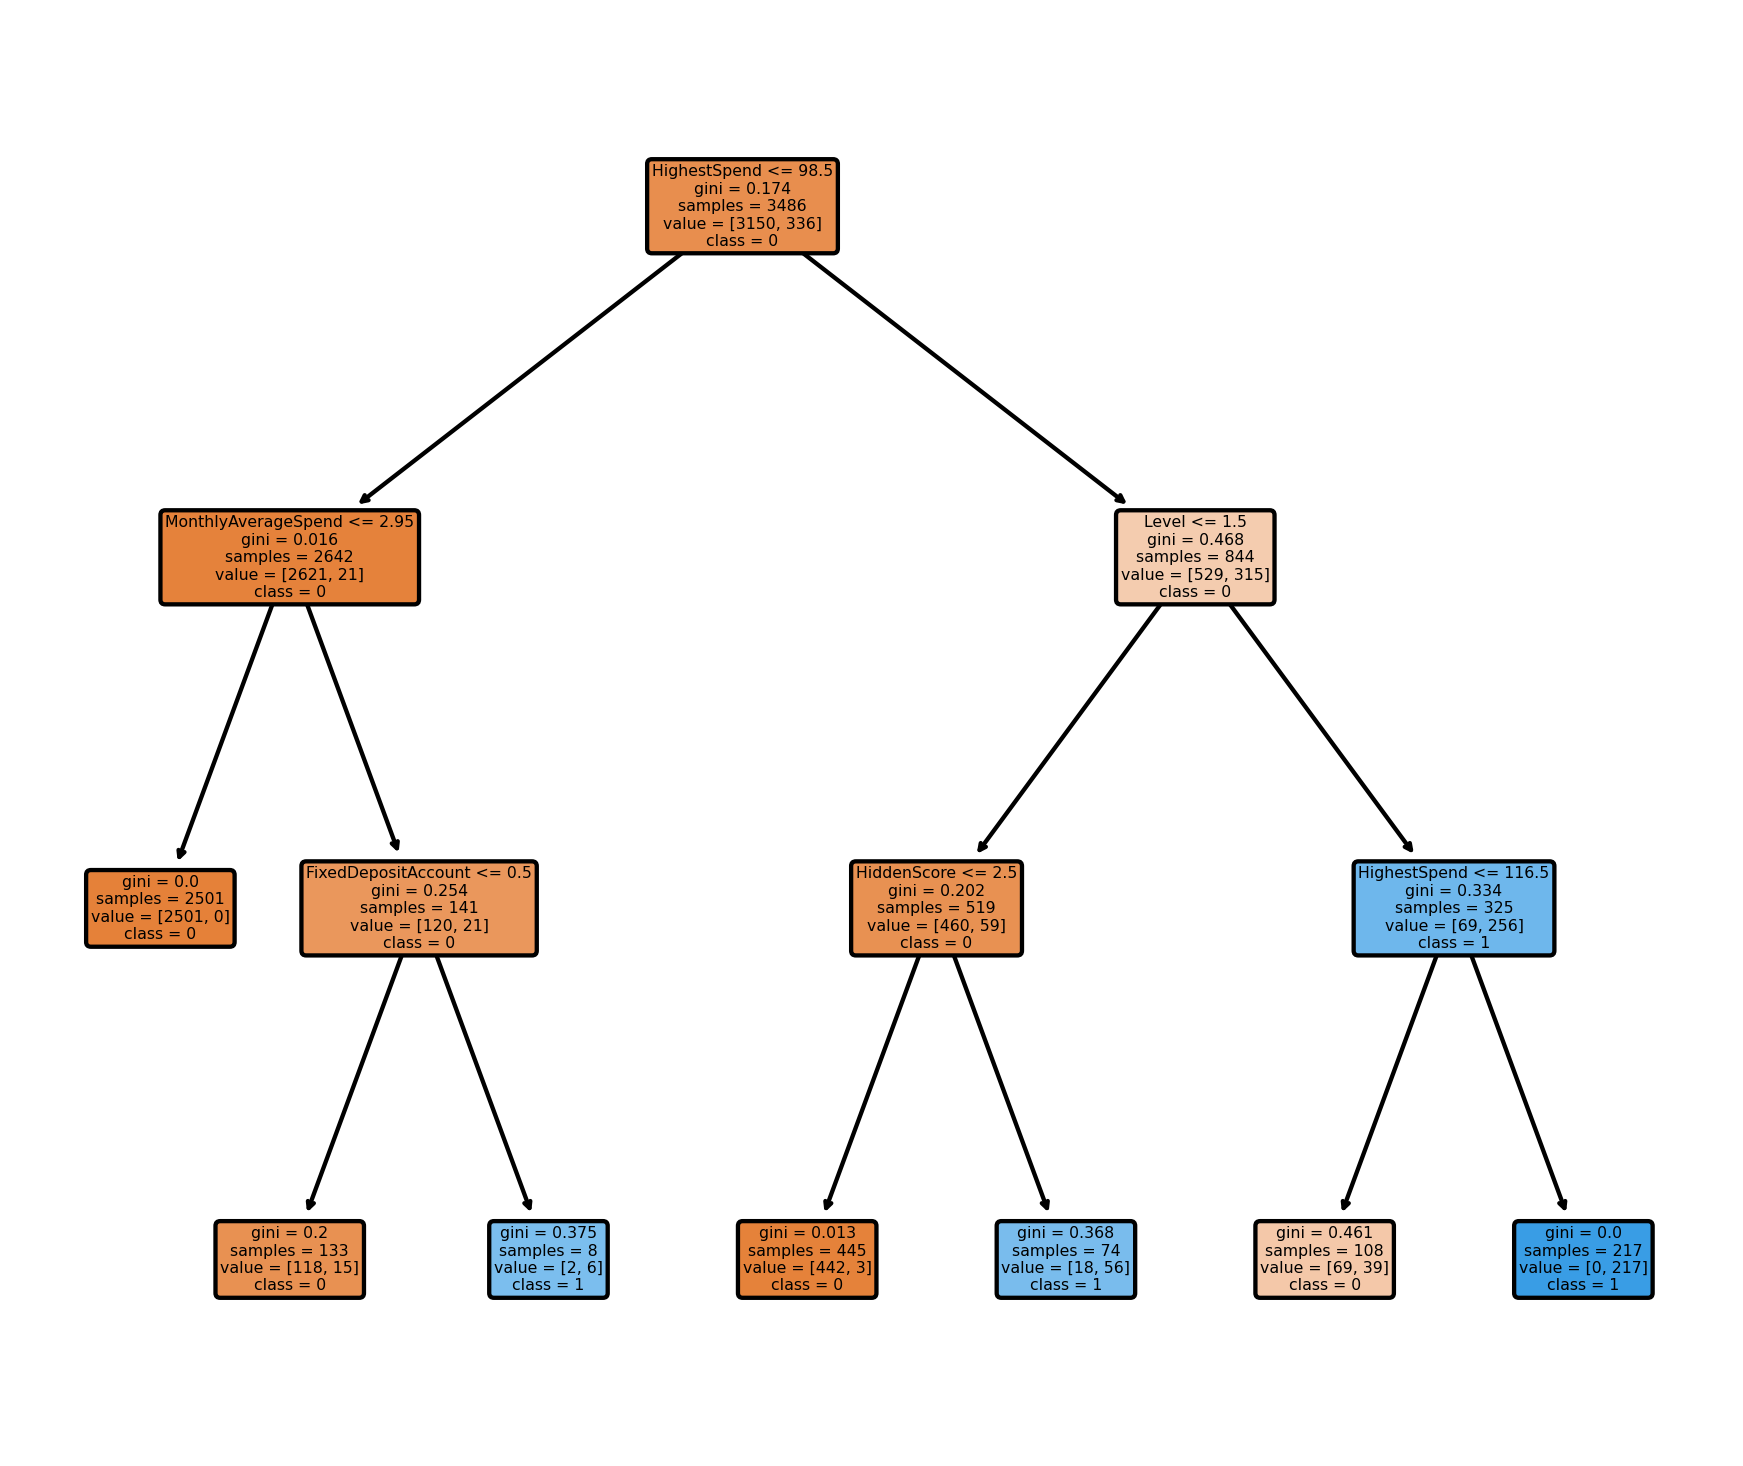

In [132]:
# Decision Tree Visualize
from sklearn.tree import plot_tree
dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTree.fit(X_train, y_train)

fn = list(X_train) # features names
cn = ['0','1']     # class names

fig,axes = plt.subplots(figsize = (7, 6),dpi=310) 
plot_tree(dTree, feature_names=fn, class_names=cn, filled=True,rounded=True)
fig.savefig('tree.png')

# Random Forest Classifier Algorithm

In [134]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=23)
model.fit(X_train,y_train)

# Prediction
y_predict = model.predict(X_test)

# Preformance Metrics
print('Accuracy score:',accuracy_score(y_test,y_predict))
print('confusion matrix:\n',confusion_matrix(y_test,y_predict))
print('roc_auc score:',roc_auc_score(y_test,y_predict))
print('precision score:',precision_score(y_test,y_predict))

print('recall score:',recall_score(y_test,y_predict))
print('f1 score:',f1_score(y_test,y_predict))

Accuracy score: 0.9859437751004017
confusion matrix:
 [[1348    2]
 [  19  125]]
roc_auc score: 0.933287037037037
precision score: 0.984251968503937
recall score: 0.8680555555555556
f1 score: 0.922509225092251


#### Obsevation:
We can see the random forest performs well even without tuning the hyperparameters

# Handelling Unbalanced Data 

In [136]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Lets summarize the class distribution
counter = Counter(y)
print(counter)

Counter({0.0: 4500, 1.0: 480})


In [151]:
over = SMOTE(sampling_strategy=0.3,random_state=23)
under = RandomUnderSampler(sampling_strategy=0.6,random_state=23)

# Creating a pipeline
steps = [('o',over),('u',under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
Xb, yb = pipeline.fit_resample(XScaled,y)   # Using scaled data

# Lets summarize the new data's class distribution
counter = Counter(yb)
print(counter)

Counter({0.0: 2250, 1.0: 1350})


#### Observation:
Now the data looks almost balanced, we can use this new data to build the models

In [153]:
# Train and Test split
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.3, random_state=23)

## SVM with balanced Data

In [154]:
# Model with best parameters
svm_model = SVC(C=10, gamma=0.1)   # Used best parameters from previously computed model
svm_model.fit(X_trainb,y_trainb)

# Prediction
y_predict = svm_model.predict(X_testb)

# Prefiormance Metrics
print('Accuracy score:',accuracy_score(y_testb,y_predict))
print('confusion matrix:\n',confusion_matrix(y_testb,y_predict))
print('roc_auc score:',roc_auc_score(y_testb,y_predict))
print('precision score:',precision_score(y_testb,y_predict))

print('recall score:',recall_score(y_testb,y_predict))
print('f1 score:',f1_score(y_testb,y_predict))

Accuracy score: 0.9638888888888889
confusion matrix:
 [[665  22]
 [ 17 376]]
roc_auc score: 0.9623598564396592
precision score: 0.9447236180904522
recall score: 0.9567430025445293
f1 score: 0.9506953223767383


# Random Forest classifier with Balanced Data

In [155]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=23)
model_rfc.fit(X_trainb,y_trainb)

# Prediction
y_predict = model_rfc.predict(X_testb)

# Preformance Metrics
print('Accuracy score:',accuracy_score(y_testb,y_predict))
print('confusion matrix:\n',confusion_matrix(y_testb,y_predict))
print('roc_auc score:',roc_auc_score(y_testb,y_predict))
print('precision score:',precision_score(y_testb,y_predict))

print('recall score:',recall_score(y_testb,y_predict))
print('f1 score:',f1_score(y_testb,y_predict))

Accuracy score: 0.9842592592592593
confusion matrix:
 [[678   9]
 [  8 385]]
roc_auc score: 0.9832716646110425
precision score: 0.9771573604060914
recall score: 0.9796437659033079
f1 score: 0.9783989834815755


### Grid Search for Random Forest Classsifier

In [158]:
param_grid = {'n_estimators': [50,100,150,200], 'max_depth': [5,10,15,20],'criterion': ['gini', 'entropy']}

grid = GridSearchCV(estimator=model_rfc,param_grid=param_grid,refit=True,verbose=2,n_jobs=-1)

grid.fit(X_trainb,y_trainb)

print(grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
RandomForestClassifier(max_depth=15, n_estimators=50, random_state=23)


#### Refit the model with new optimized parameters

In [159]:
rfc_final = RandomForestClassifier(max_depth=15, n_estimators=50,random_state=23)
rfc_final.fit(X_trainb,y_trainb)

# Prediction
y_predict = rfc_final.predict(X_testb)

# Preformance Metrics
print('Accuracy score:',accuracy_score(y_testb,y_predict))
print('confusion matrix:\n',confusion_matrix(y_testb,y_predict))
print('roc_auc score:',roc_auc_score(y_testb,y_predict))
print('precision score:',precision_score(y_testb,y_predict))

print('recall score:',recall_score(y_testb,y_predict))
print('f1 score:',f1_score(y_testb,y_predict))

Accuracy score: 0.9824074074074074
confusion matrix:
 [[676  11]
 [  8 385]]
roc_auc score: 0.9818160605353512
precision score: 0.9722222222222222
recall score: 0.9796437659033079
f1 score: 0.9759188846641319


#### Observation:
###### Of all model performance metrics, Random forest with balanced weights has very good metrics. Therefore, we will save that model and reuse it for future predictions.

## Pickle the model

In [160]:
import pickle
filename = 'finalized_model.pickle'
pickle.dump(rfc_final,open(filename,'wb'))

#### Lets check dumped model can give expected results or not , we can load the pickle model and use for Future predictions

In [163]:
# Checking the pickle model
file = 'finalized_model.pickle'
load_model = pickle.load(open(file,'rb'))

# Prediction
y_predict = load_model.predict(X_testb)

# Preformance Metrics
print('Accuracy score:',accuracy_score(y_testb,y_predict))
print('confusion matrix:\n',confusion_matrix(y_testb,y_predict))
print('roc_auc score:',roc_auc_score(y_testb,y_predict))
print('precision score:',precision_score(y_testb,y_predict))

print('recall score:',recall_score(y_testb,y_predict))
print('f1 score:',f1_score(y_testb,y_predict))

Accuracy score: 0.9824074074074074
confusion matrix:
 [[676  11]
 [  8 385]]
roc_auc score: 0.9818160605353512
precision score: 0.9722222222222222
recall score: 0.9796437659033079
f1 score: 0.9759188846641319


#### Great ! Its Working as expected

# Conclusion

###### 1. We have built a model using logistic regression, Naive Bayes, Support vector machine and Random forest classifier.

###### 2. This dataset is highly imbalance,therefore accuracy can't a good measure, Hence we have used precision, Recall, and AUC scores for determining better model.

###### 3. We use class weight technique to handle Unbalanced data and observe that the model performance improved by considering class weight.

###### 4. We seen how Scaling/data transformation plays a major role when we work on SVM.

###### 5. We have also explored undersampling and oversampling technique like SMOTE and RandomUnderSampler to handle data imbalance.

###### 6. We have also seen how to systematically improve a model by fine tuning the Hyper parameters using Grid Search